## cmd 창을 이용하여 데이터 출력
- window 버전 다운로드 : https://github.com/UB-Mannheim/tesseract/wiki
- 환경변수 path 설정 : Tesseract-OCR이 설치된 폴더를 추가
- Cmd 테스트
    - tesseract [이미지 경로] stdout -l kor+eng : 한글과 영문 인식

#### 라이브러리

In [3]:
from PIL import Image
from PIL import ImageFilter
from pytesseract import *

import cv2

#### pytesseract 사용
- 이미지에 있는 문자 읽어오기
---
해야할것
- 정해진 구역의 텍스트만 읽어오기
---
다른 방안 
- 네이버 OCR Cloud 서비스 이용
    - Cloud를 만들고 API를 받아와서 사용하기

In [4]:
from PIL import Image
from pytesseract import *
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

filename = "test1.jpg"
image = Image.open(filename)
text = pytesseract.image_to_string(image, lang='kor+eng')

text.split('\n')
# with open("sample.txt", "w") as f:
#     f.write(text)

['   ',
 '',
 '04-21-029471',
 '',
 '헌열증서 | |!',
 '',
 '성 3: 황재현           헌철종류:전혈 400mL',
 '생년월일: 1995. 4. 22. 성별: Me Oo',
 '하신 귀하여게',
 '',
 '   ',
 '  ',
 '',
 '  ',
 '  ',
 '',
 '   ',
 '                                                                                                                              ',
 '',
 ' ',
 '  ',
 '',
 '사랑의 현혈에 동참하여 생명 나:',
 'ae a pia vee 담아 이종:',
 '헌혈일자: 2021. 3. 7.',
 '',
 '헐액원명: 부산혈액원(051 810 9000)    rs',
 'HBUSISSE',
 '',
 ' ',
 '\x0c']

In [5]:
import cv2

img_cv = cv2.imread('test1.jpg')

# By default OpenCV stores images in BGR format and since pytesseract assumes RGB format,
# we need to convert from BGR to RGB format/mode:
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
print(pytesseract.image_to_string(img_rgb, lang='kor+eng'))
# OR
# img_rgb = Image.frombytes('RGB', img_cv.shape[:2], img_cv, 'raw', 'BGR', 0, 0)
# print(pytesseract.image_to_string(img_rgb, lang='kor+eng'))

   
   
 

   
   

04-21-029471
현증서벌

헌혈증서`0 | | | it

저 ㅣ 명: 황재현           gga: AH 400mL

age: 995.422 4 # Me Oo

하신 귀하여게

 
 
 

사랑의 현혈에 등참하여 생명 나]
깊은 ZAM 감사의 마음을 담아 이 중
헌렵일자: 2021. 3. 7.

혈역원명: 부산혈액원(051 810 9000)

보건복지부장관

 

  
 

 



In [6]:
# Example of adding any additional options.
custom_oem_psm_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(image, config=custom_oem_psm_config)

'04-21-069471\nwaz) el\nkaki: TiN Mliil it\n4 3 ete gee: 2 400mL\nguage: 195.422 4g ale Oo\nBA 20) aa sae 9 ee He aaa Aaa\n\nge £4 BA ee Sot ol SHE ESHA\npigigia: 2021. 3. 7.\nqopaias: FOrANS1(051 810 9000)\n\nBASSO\n\x0c'

In [7]:
# Example config: r'--tessdata-dir "C:\Program Files (x86)\Tesseract-OCR\tessdata"'
# It's important to add double quotes around the dir path.
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata"'
pytesseract.image_to_string(image, lang='eng+kor', config=tessdata_dir_config)

'   \n\n04-21-029471\n\n헌 열 증서 | |!\n\n성 3: 황 재 현 헌 철 종 류 : 전 혈 400mL\n생년월일: 1995. 4. 22. 성별: Me Oo\n하신 귀 하 여 게\n\n   \n  \n\n  \n  \n\n   \n   \n\n \n  \n\n사 랑 의 현 혈 에 동 참 하여 생명 나:\nae a pia vee 담아 이종:\n헌 혈 일자: 2021. 3. 7.\n\n헐 액 원명: 부 산 혈 액 원 (051 810 9000) rs\nHBUSISSE\n\n \n\x0c'

#### 이미지 변환하기

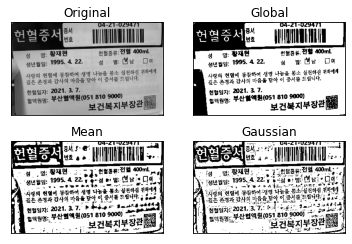

In [8]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('test1.jpg',0)
# img = cv2.medianBlur(img,5)

ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)



th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()